In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc

import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)


# 시설형 장기요양기관

In [4]:
df = pd.read_csv("data/시군구별급여종류병장기요양기관현황.csv",encoding='cp949')

In [6]:
df.columns

Index(['시·군·구별', '급여종류별', '항목', '단위', '2016 년', '2017 년', '2018 년', '2019 년',
       '2020 년'],
      dtype='object')

In [7]:
df['시·군·구별'].unique()

array(['합계', '서울', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '부산',
       '서구', '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구',
       '연제구', '수영구', '사상구', '기장군', '대구', '수성구', '달서구', '달성군', '인천',
       '미추홀구', '연수구', '남동구', '부평구', '계양구', '강화군', '옹진군', '광주', '광산구',
       '대전', '유성구', '대덕구', '울산', '울주군', '세종', '경기', '수원시장안구', '수원시권선구',
       '수원시팔달구', '수원시영통구', '성남시수정구', '성남시중원구', '성남시분당구', '의정부시', '안양시만안구',
       '안양시동안구', '부천시', '광명시', '평택시', '동두천시', '안산시상록구', '안산시단원구',
       '고양시덕양구', '고양시일산동구', '고양시일산서구', '과천시', '구리시', '남양주시', '오산시', '시흥시',
       '군포시', '의왕시', '하남시', '용인시처인구', '용인시기흥구', '용인시수지구', '파주시', '이천시',
       '안성시', '김포시', '화성시', '광주시', '양주시', '포천시', '여주시', '연천군', '가평군',
       '양평군', '강원', '춘천시', '원주시', '강릉시', '동해시', '태백시', '속초시', '삼척시',
       '홍천군', '횡성군', '영월군', '평창군', '정선군', '철원군', '화천군', '양구군', '인제군',
  

In [12]:
df['급여종류별'].unique()

array(['계', '재가', '방문요양', '방문목욕', '방문간호', '주야간보호', '단기보호', '복지용구', '시설',
       '노인요양시설', '노인요양공동생활가정'], dtype=object)

In [33]:
a=df[df['급여종류별'].str.contains("노인요양시설|노인요양공동생활가정")]

In [40]:
a = a[a['항목']=='기관수[개]']

In [46]:
a=a[a['시·군·구별'] == '합계']

In [59]:
a.columns

Index(['시·군·구별', '급여종류별', '항목', '단위', '2016 년', '2017 년', '2018 년', '2019 년',
       '2020 년'],
      dtype='object')

In [63]:
q = ['시·군·구별', '급여종류별', '항목', '단위', '2016 년', '2017 년', '2018 년', '2019 년',
       '2020 년']

In [64]:
for i in q:
    a[i] = a[i].astype(int,errors='ignore')

/var/folders/gw/2f6prwyn0kj6f1ksrvqg41340000gn/T/ipykernel_17724/1838021317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i] = a[i].astype(int,errors='ignore')


In [65]:
print(a['2016 년'].sum())
print(a['2017 년'].sum())
print(a['2018 년'].sum())
print(a['2019 년'].sum())
print(a['2020 년'].sum())

5187
5304
5320
5543
5763


In [66]:
aa = new_data = {
    '시·군·구별' : ['합계'],
    '급여종류별' : ['시설형요양기관'],
    '항목' : ['기관수[개]'],
    '단위' : ['개'],
    '2016년' : [5187],
    '2017년' : [5304],
    '2018년' : [5320],
    '2019년' : [5543],
    '2020년' : [5763],}

In [103]:
ww = pd.DataFrame(aa)
 
ss = pd.concat([a,ww])

In [104]:
ss

,시·군·구별,급여종류별,항목,단위,2016 년,2017 년,2018 년,2019 년,2020 년,2016년,2017년,2018년,2019년,2020년
14,합계,노인요양시설,기관수[개],개,3137.0,3289.0,3389.0,3604.0,3850.0,NaN,NaN,NaN,NaN,NaN
16,합계,노인요양공동생활가정,기관수[개],개,2050.0,2015.0,1931.0,1939.0,1913.0,NaN,NaN,NaN,NaN,NaN
0,합계,시설형요양기관,기관수[개],개,NaN,NaN,NaN,NaN,NaN,5187.0,5304.0,5320.0,5543.0,5763.0


In [105]:
ss.columns

Index(['시·군·구별', '급여종류별', '항목', '단위', '2016 년', '2017 년', '2018 년', '2019 년',
       '2020 년', '2016년', '2017년', '2018년', '2019년', '2020년'],
      dtype='object')

In [108]:
r=['시·군·구별', '급여종류별', '항목', '2016년', '2017년', '2018년', '2019년', '2020년']

In [109]:
ss = ss.loc[0:,r]

In [126]:
w = ss.T.iloc[3:]

In [127]:
w

,0
2016년,5187.0
2017년,5304.0
2018년,5320.0
2019년,5543.0
2020년,5763.0


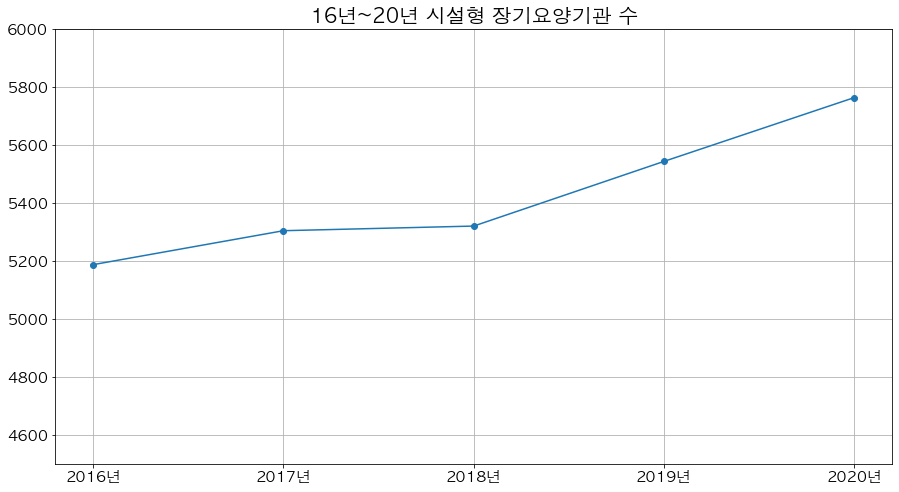

In [148]:
#시도별 고령화 비율
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(w,marker='o')
plt.grid(True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("16년~20년 시설형 장기요양기관 수",size=20)
plt.ylim(4500,6000);

# 요양병원 

In [159]:
new_data = {
    '2016년' : [1428],
    '2017년' : [1529],
    '2018년' : [1560],
    '2019년' : [1577],
    '2020년' : [1582],}

In [160]:
we = pd.DataFrame(new_data)

In [162]:
we.T

,0
2016년,1428
2017년,1529
2018년,1560
2019년,1577
2020년,1582


(1350.0, 1650.0)

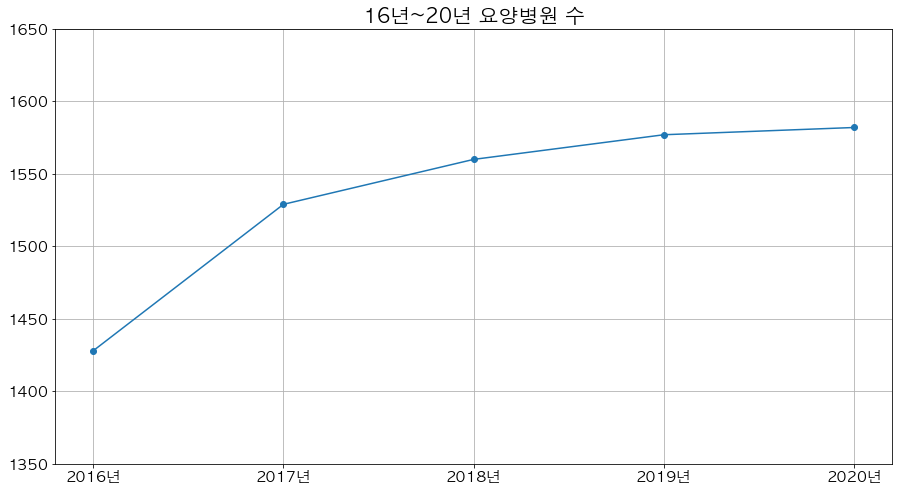

In [171]:
#16~20년 요양병원 수
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(we.T,marker='o')
plt.grid(True)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("16년~20년 요양병원 수",size=20)
plt.ylim(1350,1650)